In [1]:
import os
os.getcwd()

'C:\\Users\\Shweta\\Downloads'

In [1]:
os.chdir('C:\\Users\\Shweta\\Documents\\great learning\\ML')

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignoring warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:\\Users\\Shweta\\Downloads\\Project+-+Files\\Project\\train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
# Filling missing names with "Unknown"
df['Name'] = df['Name'].fillna('Unknown')

## Cleaning 'Age' column

In [6]:
df['Age'] = df['Age'].str.replace('_','')
df['Age'] = df['Age'].astype(float)
median_ages = df.groupby('Customer_ID')['Age'].median().reset_index()

In [7]:
df = df.merge(median_ages,on = 'Customer_ID', suffixes = ('_original','_median'))

In [8]:
# Replacing abnormal age values with median age values
df.loc[((df['Age_original'] > 85) | (df['Age_original'] < 18)),'Age_original'] = df['Age_median']
#Drop median age column and rename the original age column
df.drop(columns = ['Age_median'], inplace = True)
df.rename(columns ={'Age_original' : 'Age'},inplace = True)     

### Cleaning SSN column

In [9]:
# Replace anomaly with special value
df['SSN'] = df['SSN'].replace('#F%$D@*&8', '999-99-9999')

In [10]:
# Cleaning Occupation column
occ_mode = df.groupby('Customer_ID')['Occupation'].apply(lambda x: x.mode().iloc[0]).reset_index()
occ_mode.columns = ['Customer_ID', 'Occupation_Mode']
df['Occupation'] = np.where(df['Occupation'] == '_______', df['Customer_ID'].map(occ_mode.set_index('Customer_ID')['Occupation_Mode']), df['Occupation'])

In [11]:
df['Occupation'] = df['Occupation'].replace('_______','Unknown')

In [12]:
# Cleaning annual income column
df['Annual_Income'] = df['Annual_Income'].str.replace('_','').astype(float)
df['Annual_Income'] = df['Annual_Income'].round(2)

In [13]:
# Cleaning Num_Bank_Accounts column
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].abs()

In [14]:
# Cleaning Num_of_Loan column
df['Num_of_Loan'] = df['Num_of_Loan'].replace('-100','1')
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_','').astype(int)

In [15]:
# Cleaning Type_of_Loan column
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Unknown')

In [16]:
# Cleaning Delay_from_due_date column
df['Delay_from_due_date']=df['Delay_from_due_date'].abs()

In [17]:
# Cleaning Num_of_Delayed_Payment column
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_','')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

In [18]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].abs()

In [19]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())


In [20]:
#Cleaning Changed_Credit_Limit column
# Replace '_' with NaN for calculation
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)

In [21]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

In [22]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df.groupby('Customer_ID')['Changed_Credit_Limit'].transform('median'))

In [23]:
# Cleaning  Num_Credit_Inquiries column
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform('median'))

In [24]:
# Cleaning Credit_Mix column
CreditMix_mode = df.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.mode().iloc[0]).reset_index()
CreditMix_mode.columns = ['Customer_ID', 'creditMix_Mode']
df['Credit_Mix'] = np.where(df['Credit_Mix'] == '_', df['Customer_ID'].map(CreditMix_mode.set_index('Customer_ID')['creditMix_Mode']), df['Credit_Mix'])

In [25]:
df['Credit_Mix'] = df['Credit_Mix'].replace('Bad',0)
df['Credit_Mix'] = df['Credit_Mix'].replace('Standard',1)
df['Credit_Mix'] = df['Credit_Mix'].replace('Good',2)

In [26]:
# After filling the missing values with the mode of customer wise Credit_mix , we still have some missing values left in the dataframe.
# Calculate the mode of the column
df['Credit_Mix'].value_counts() # 1 is the most occurrence rating 
#Imputing the left missing values with 1
df['Credit_Mix'] = df['Credit_Mix'].replace('_',1)
df['Credit_Mix'] = df['Credit_Mix'].astype(int)

In [27]:
# Cleaning Outstanding_Debt column
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_','').astype(float)

In [28]:
# Cleaning Credit_History_Age column
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [29]:
# Function to extract years and months, and convert to decimal format
def convert_creditHistAge(d):
    years, months = d.replace('Years', '').replace('Months', '').split('and')
    years, months = int(years.strip()), int(months.strip())
    return years + (months / 12)

In [30]:
# Apply the function to the 'Credit_History_Age' column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_creditHistAge)

In [31]:
df['Credit_History_Age'] = df['Credit_History_Age'].round(2)
df['Credit_History_Age'] = df['Credit_History_Age'].astype(float)

In [32]:
# Cleaning Payment_of_Min_Amount column
payment_mode = df.groupby('Customer_ID')['Payment_of_Min_Amount'].apply(lambda x: x.mode().iloc[0]).reset_index()
payment_mode.columns = ['Customer_ID', 'payment_Mode']
df['Payment_of_Min_Amount'] = np.where(df['Payment_of_Min_Amount'] == 'NM', df['Customer_ID'].map(payment_mode.set_index('Customer_ID')['payment_Mode']), df['Payment_of_Min_Amount'])

In [33]:
# calculating the mode of column and imputing the 'NM' entries with the mode
df['Payment_of_Min_Amount'].value_counts() # yes is the most occurred response
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM','Yes')

In [34]:
# Cleaning Amount_invested_monthly column
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__',np.nan)

In [35]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df.groupby('Customer_ID')['Amount_invested_monthly'].transform('median'))

In [36]:
#Cleaning Payment_Behaviour column !@9#%8
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8',np.nan)
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [37]:
# Cleaning Monthly_Balance column
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)

In [38]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df.groupby('Customer_ID')['Monthly_Balance'].transform('median'))

In [39]:
# Cleaning Monthly_Inhand_Salary column
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform('median'))


In [40]:
# Hnadling Month column
df['Month'] = df['Month'].replace('January',1)
df['Month'] = df['Month'].replace('February',2)
df['Month'] = df['Month'].replace('March',3)
df['Month'] = df['Month'].replace('April',4)
df['Month'] = df['Month'].replace('May',5)
df['Month'] = df['Month'].replace('June',6)
df['Month'] = df['Month'].replace('July',7)
df['Month'] = df['Month'].replace('August',8)

In [41]:
df['Month'] = df['Month'].astype(int)

In [64]:
#Cleaning Num_Bank_Accounts
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: min(x, 5))

### Encoding the target column i.e Credit_Score column
### 'Poor' - 0, 'Standard' - 1, 'Good' - 2 

In [42]:
df['Credit_Score'] = df['Credit_Score'].replace('Poor',0)
df['Credit_Score'] = df['Credit_Score'].replace('Standard',1)
df['Credit_Score'] = df['Credit_Score'].replace('Good',2)

In [43]:
df['Credit_Score'].value_counts()

Credit_Score
1    53174
0    28998
2    17828
Name: count, dtype: int64

## EDA

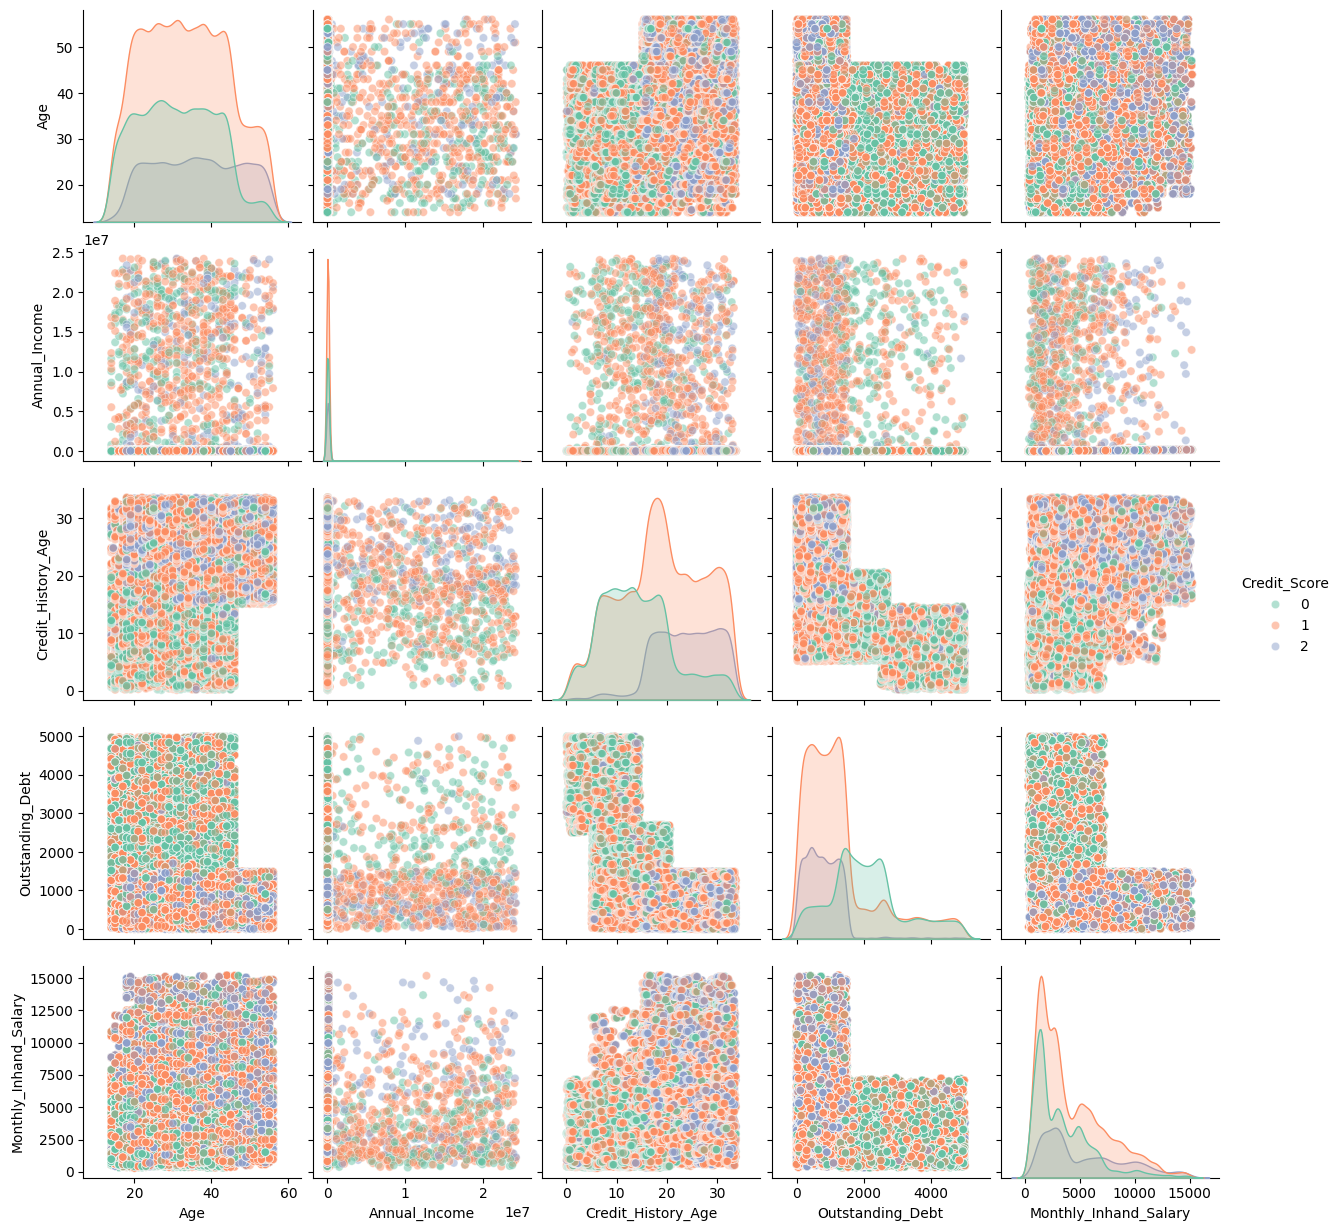

In [45]:
sns.pairplot(df, vars=['Age', 'Annual_Income', 'Credit_History_Age', 'Outstanding_Debt', 'Monthly_Inhand_Salary'], 
             hue='Credit_Score', 
             palette='Set2', 
             plot_kws={'alpha': 0.5}, 
             diag_kind='kde')
plt.show()


In [44]:
df.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,4.500000,33.313615,1.764157e+05,4198.490149,17.091700,22.47443,72.466040,6.924720,21.095040,29.759690,...,27.321850,1.0662,1426.220376,32.285173,18.425924,1403.118217,193.686347,18.425924,403.492393,0.88830
std,2.291299,10.762312,1.429618e+06,3187.491752,117.404773,129.05741,466.422621,59.146423,14.822802,218.014703,...,191.295092,0.7307,1155.129026,5.116875,8.305736,8306.041270,194.785222,8.305736,214.423009,0.67512
min,1.000000,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.230000,20.000000,0.080000,0.000000,0.000000,0.080000,0.007760,0.00000
25%,2.750000,24.000000,1.945750e+04,1626.761667,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,...,3.000000,1.0000,566.072500,28.052567,12.000000,30.306660,73.730625,12.000000,270.322511,0.00000
50%,4.500000,33.000000,3.757861e+04,3095.978333,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,...,6.000000,1.0000,1166.155000,32.305784,18.250000,69.249473,129.361839,18.250000,337.270985,1.00000
75%,6.250000,42.000000,7.279092e+04,5961.637500,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,...,9.000000,2.0000,1945.962500,36.496663,25.170000,161.224249,234.346249,25.170000,471.928804,1.00000
max,8.000000,56.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,...,2597.000000,2.0000,4998.070000,50.000000,33.670000,82331.000000,1977.326102,33.670000,1602.040519,2.00000


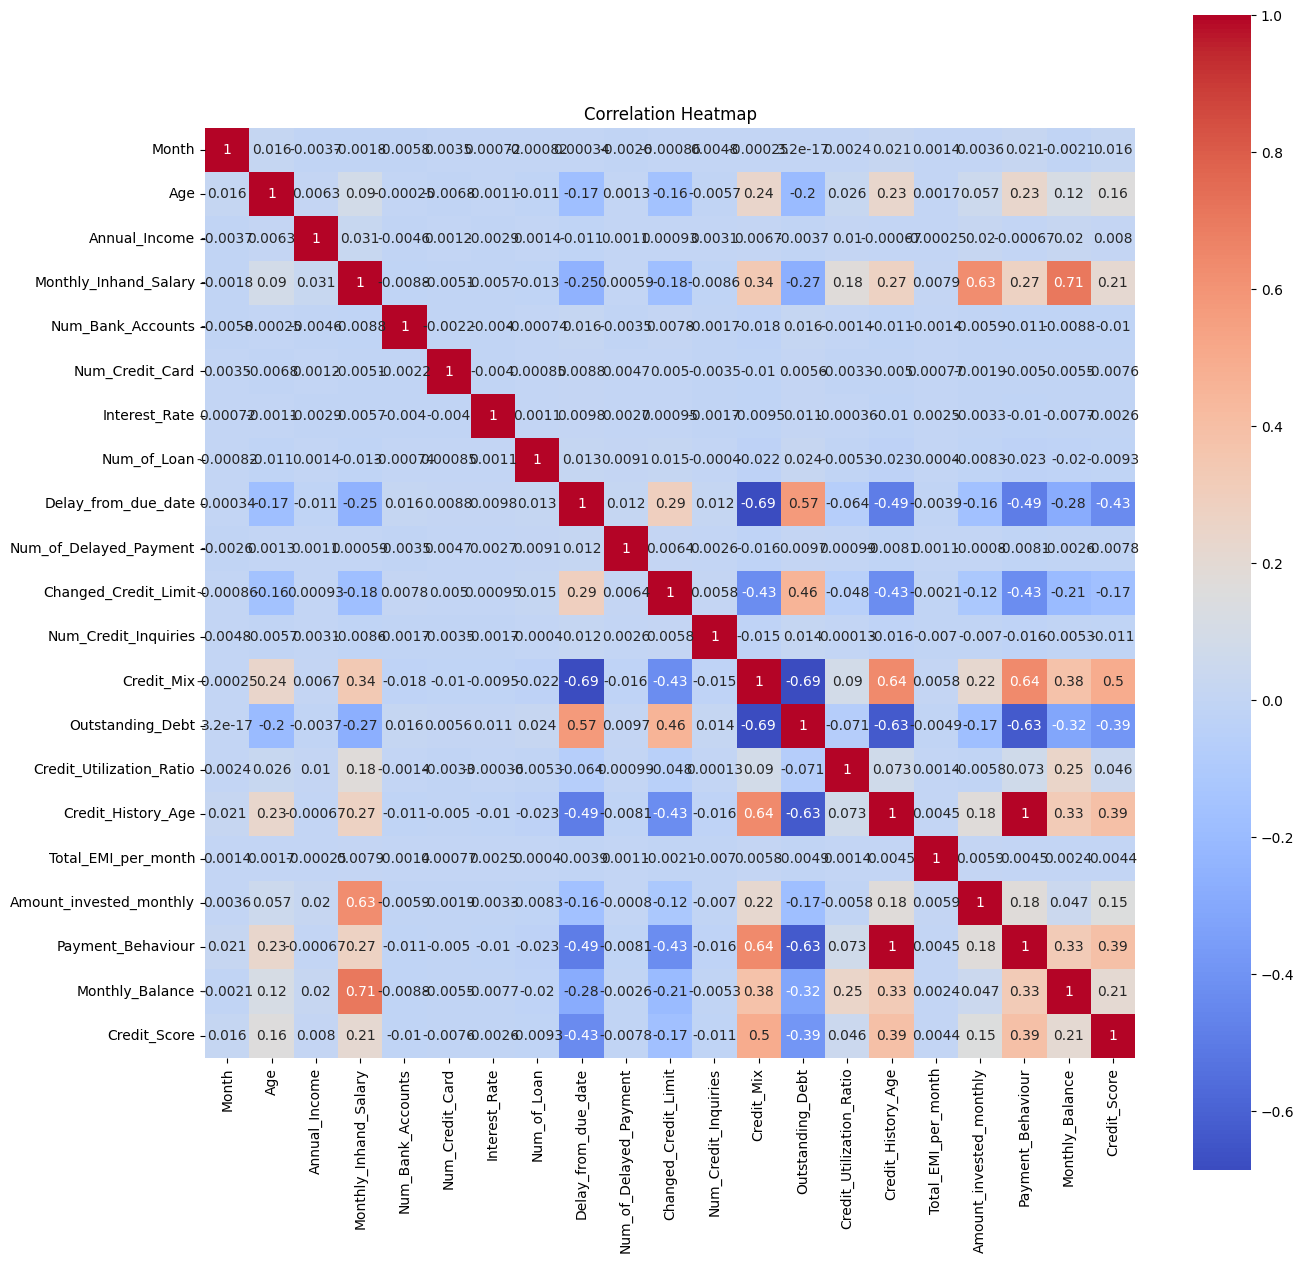

In [46]:
# Correlation matrix
# Calculate correlations
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Plot correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()



In [48]:
from scipy.stats import shapiro
# Shapiro wilk test to check for normality

from scipy.stats import shapiro
stat, p = shapiro(df['Annual_Income'])
alpha = 0.05
print(f'Shapiro-Wilk statistic: {stat}, p-value: {p}')
if p > alpha:
    print('Data is likely normally distributed.')
else:
    print('Data is not normally distributed.')

Shapiro-Wilk statistic: 0.07387115461898563, p-value: 9.004504467555823e-182
Data is not normally distributed.


In [49]:
#Non parametric test( kruskal wallis H-test) 
#to check whether annual income varies across all the classes of the target column
from scipy.stats import kruskal
groups = [df.loc[df['Credit_Score'] == i, 'Credit_Utilization_Ratio'] for i in [0,1,2]]
h_stat, p_val = kruskal(*groups)
alpha = 0.05
print(f'H-statistic: {h_stat}, p-value: {p_val}')
if p_val < alpha:
    print('Annual income varies significantly across Credit Score classes.')
else:
    print('Annual income does not vary across Credit Score classes.')


H-statistic: 179.44399399321992, p-value: 1.0820113066707541e-39
Annual income varies significantly across Credit Score classes.


#### Test the independence between categorical independent variables and the target variable.

In [50]:
from scipy.stats import chi2_contingency
# Create contingency table
contingency_table = pd.crosstab(df['Occupation'], df['Credit_Score'])
chi2_stat, p_val, dof, _ = chi2_contingency(contingency_table)
alpha = 0.05
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_val}')
if p_val < alpha:
    print('Occupation and target variable are not independent.')
else:
    print('Occupation and target variable are independent.')

Chi-square statistic: 181.99527940671985, p-value: 1.0909351574498054e-23
Occupation and target variable are not independent.


<Axes: xlabel='Credit_Score', ylabel='Age'>

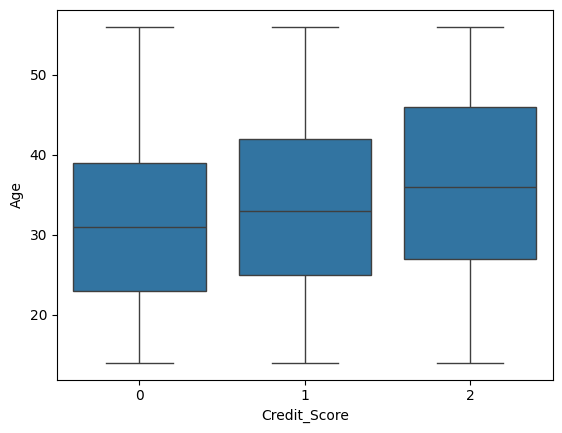

In [49]:
sns.boxplot(data=df,x='Credit_Score',y='Age')


In [52]:
# Perform ANOVA
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(*[df.loc[df['Credit_Score'] == cat, 'Age'] for cat in df['Credit_Score'].unique()])
print(f'F-statistic: {f_stat}, p-value: {p_val}')
if p_val<0.05:
    print('Reject the null hypothesis,This means that the age variable is likely to be related to the credit_score variable.')
else:
    print("Fail to reject the null hypothesis, This means that the age variable is unlikely to be related to the credit_score variable.")


F-statistic: 1331.7019899474474, p-value: 0.0
Reject the null hypothesis,This means that the age variable is likely to be related to the credit_score variable.


<Axes: xlabel='Credit_Score', ylabel='Annual_Income'>

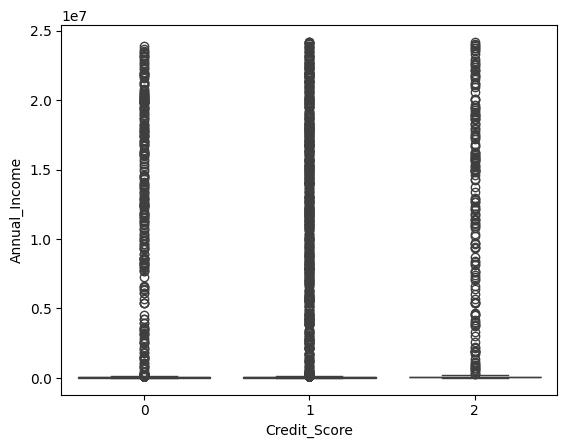

In [53]:
sns.boxplot(data=df,x='Credit_Score',y='Annual_Income')

In [75]:
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(*[df.loc[df['Credit_Score'] == cat, 'Annual_Income'] for cat in df['Credit_Score'].unique()])
print(f'F-statistic: {f_stat}, p-value: {p_val}')
if p_val<0.05:
    print('Reject the null hypothesis,This means that the annual income variable is likely to be related to the credit_score variable.')
else:
    print("Fail to reject the null hypothesis, This means that the annual variable is unlikely to be related to the credit_score variable.")


F-statistic: 4.592016425856399, p-value: 0.010134543253269984
Reject the null hypothesis,This means that the annual income variable is likely to be related to the credit_score variable.


<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

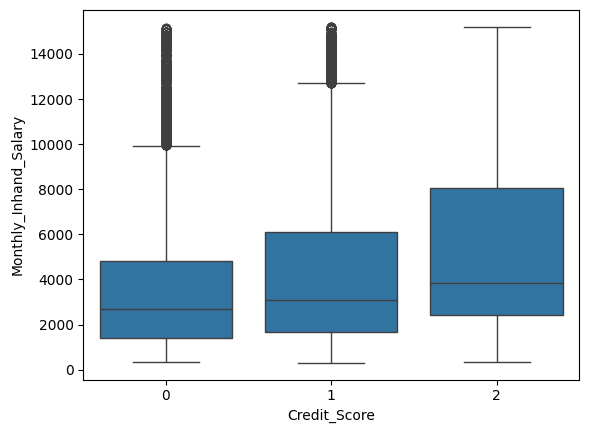

In [54]:
sns.boxplot(data=df,x='Credit_Score',y='Monthly_Inhand_Salary')

<Axes: xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

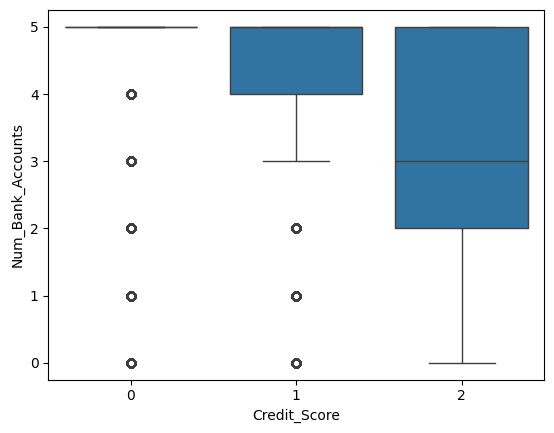

In [65]:
sns.boxplot(data=df,x='Credit_Score',y='Num_Bank_Accounts')


### RandomForest Model

In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(['ID','Name','Customer_ID','Credit_Score','SSN'], axis=1)
y = df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle categorical features
categorical_cols = ['Occupation','Type_of_Loan', 'Payment_of_Min_Amount']
X_train[categorical_cols] = X_train[categorical_cols].apply(LabelEncoder().fit_transform)
X_test[categorical_cols] = X_test[categorical_cols].apply(LabelEncoder().fit_transform)

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Age','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Outstanding_Debt', 
         'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 
         'Amount_invested_monthly','Monthly_Balance']] = scaler.fit_transform(X_train[['Age',
                                                                                       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Outstanding_Debt', 
                                                                                       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 
                                                                                       'Amount_invested_monthly', 'Monthly_Balance']])
X_test[['Age',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Outstanding_Debt', 
        'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 
        'Amount_invested_monthly', 'Monthly_Balance']] = scaler.transform(X_test[['Age',
                                                                                'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Outstanding_Debt', 
                                                                                'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 
                                                                                'Amount_invested_monthly', 'Monthly_Balance']])

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.821
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      5874
           1       0.84      0.82      0.83     10599
           2       0.78      0.78      0.78      3527

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000

Confusion Matrix:
[[4937  857   80]
 [1168 8737  694]
 [  19  762 2746]]
